<a href="https://colab.research.google.com/github/Carolinsrainbow/UC_MachineLearning/blob/main/Tarea_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Cargar el conjunto de datos
file_path = 'us_stocks_indicators.csv'
data = pd.read_csv(file_path)

# Mostrar información básica del dataset
print(data.head())
print(data.info())

   Year   Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0  2014  3.878567       -0.129934         1.790827      7.800696   
1  2014  0.200522       -0.108851         0.143151      0.275383   
2  2014  0.432598       -0.105983         0.346556      0.498363   
3  2014  0.528338       -0.085962         0.628055      0.089929   
4  2014  5.767776       -0.118091         3.321925      9.931729   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0     -0.176558      9.122478            7.021603          7.492154   
1     -0.176558      0.487538            0.290552          0.178611   
2      0.082470      0.500981            0.332736          0.710699   
3     -0.176558      0.032375           -0.089120          0.427129   
4     -0.176558     13.815935           10.011302          7.390123   

   Interest Expense  ...  Receivables growth  Inventory Growth  Asset Growth  \
0          2.218515  ...           -0.160494         -0.273101     -0.255555   
1   

#División del Conjunto de Datos

La división de los datos se realizó en base al año, considerando que este es un problema relacionado con datos financieros. En contextos temporales, es crucial evitar “filtraciones de datos futuros” al conjunto de entrenamiento, lo que podría generar resultados artificialmente optimistas.

Decisión:
* Entrenamiento (2014-2016): Los modelos deben aprender de datos históricos para identificar patrones.
* Validación (2017): Se utiliza para ajustar hiperparámetros y seleccionar los mejores modelos sin tocar los datos de prueba.
* Prueba (2018): Representa un conjunto completamente independiente para evaluar el desempeño real del modelo.

In [ ]:
# División basada en años
train_data = data[data['Year'] <= 2016]
validation_data = data[data['Year'] == 2017]
test_data = data[data['Year'] == 2018]

# Separar características y etiquetas
X_train, y_train = train_data.drop(['Class', 'Year'], axis=1), train_data['Class']
X_val, y_val = validation_data.drop(['Class', 'Year'], axis=1), validation_data['Class']
X_test, y_test = test_data.drop(['Class', 'Year'], axis=1), test_data['Class']

#Entrenamiento de Modelos

## Variedad de Modelos:

Se eligieron cuatro tipos de modelos para abarcar diferentes enfoques en el aprendizaje supervisado:

* Logistic Regression: Modelo lineal interpretativo y eficiente, adecuado para problemas binarios simples.
* Random Forest: Modelo basado en ensambles que maneja datos no lineales, robusto frente a ruido.
* Gradient Boosting: Modelo avanzado que optimiza los errores iterativamente, ideal para mejorar predicciones en datos complejos.
* SVM (Support Vector Machines): Efectivo para problemas con fronteras de decisión claras y datos de alta dimensión.

La selección cubre tanto modelos interpretables como de alto rendimiento, garantizando análisis equilibrados.

## Criterio de Selección de Mejores Modelos:

Los modelos se evaluarán utilizando métricas como:

* Precisión y Recall: Esenciales para detectar desequilibrios en la predicción de clases.
* F1-Score: Métrica equilibrada para combinar precisión y recall.

Seleccionaremos los dos mejores modelos según su rendimiento en validación.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Inicializar modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

# Entrenamiento y evaluación
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f"Resultados para {name}:")
    print(classification_report(y_val, y_pred))

Resultados para Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1916
           1       1.00      0.99      1.00       800

    accuracy                           1.00      2716
   macro avg       1.00      1.00      1.00      2716
weighted avg       1.00      1.00      1.00      2716

Resultados para Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1916
           1       1.00      1.00      1.00       800

    accuracy                           1.00      2716
   macro avg       1.00      1.00      1.00      2716
weighted avg       1.00      1.00      1.00      2716

Resultados para Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1916
           1       1.00      1.00      1.00       800

    accuracy                           1.00      2716
   macro avg       1.00  

# Validar el Dataset

El rendimiento perfecto en todos los modelos puede ser una señal de sobreajuste o una falta de complejidad en los datos.

Comprobar la redundancia en las características: Algunas variables pueden ser altamente correlacionadas o directamente derivadas de la etiqueta (Class), lo que hace que los modelos predigan con demasiada facilidad.

**Acción:** Analizar correlaciones entre las variables y eliminar aquellas redundantes.

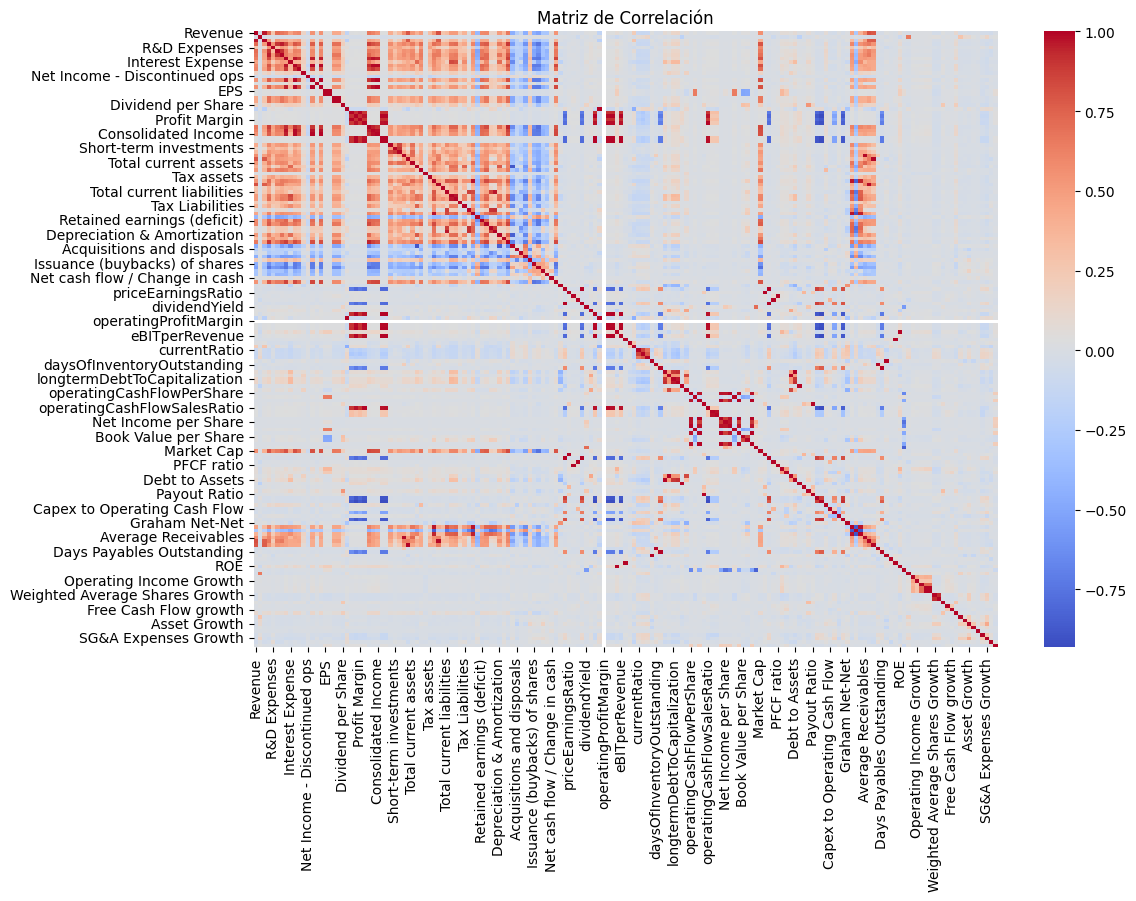

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
correlation_matrix = X_train.corr()

# Visualizar las correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Matriz de Correlación")
plt.show()


In [ ]:
import numpy as np

# Configurar el umbral de correlación
threshold = 0.9  # Correlación alta por encima del 95%

# Calcular la matriz de correlación
corr_matrix = X_train.corr().abs()

# Seleccionar la parte superior de la matriz de correlación
upper_triangle = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

# Identificar columnas para eliminar
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Imprimir columnas a eliminar
print("Columnas eliminadas por alta correlación:", to_drop)

# Eliminar variables altamente correlacionadas
X_train = X_train.drop(to_drop, axis=1)
X_val = X_val.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

Columnas eliminadas por alta correlación: ['SG&A Expense', 'EBIT Margin', 'EBITDA', 'Investments', 'Operating Cash Flow', 'longtermDebtToCapitalization', 'R&D to Revenue', 'Stock-based compensation to Revenue', 'Weighted Average Shares Diluted Growth']


# Aumentar la Complejidad de Validación

Los datos de validación pueden ser demasiado similares a los datos de entrenamiento. Cambiar el método de partición podría ayudar:

Usar k-fold cross-validation para evaluar los modelos.
Aleatorizar los datos para evitar que los conjuntos de entrenamiento y validación compartan patrones específicos.

In [ ]:
from sklearn.model_selection import cross_val_score

# Re-entrenar Logistic Regression con k-fold
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=1000)

scores = cross_val_score(logistic, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean()}")


Cross-validation scores: [0.99332777 0.99833194 0.99749791 0.99499165 0.99582638]
Mean accuracy: 0.99599513228191


# Añadir Regularización

Los modelos como Random Forest y Gradient Boosting pueden sobreajustar si tienen demasiados parámetros o si no están regularizados. Ajusta los hiperparámetros:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Ajustar modelos con regularización
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, penalty='l2', C=1.0),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,         # Número de árboles
        max_depth=10,             # Máxima profundidad
        min_samples_split=10,     # Mínimas muestras para dividir un nodo
        min_samples_leaf=5,       # Mínimas muestras en una hoja
        max_features="sqrt",      # Características seleccionadas por nodo
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        n_estimators=100,         # Número de árboles
        learning_rate=0.1,        # Tasa de aprendizaje
        max_depth=3,              # Máxima profundidad de cada árbol
        min_samples_split=10,     # Mínimas muestras para dividir un nodo
        min_samples_leaf=5,       # Mínimas muestras en una hoja
        random_state=42
    ),
    "SVM": SVC(
        kernel='rbf',             # Kernel radial básico
        C=1.0,                    # Regularización
        probability=True          # Activar probabilidades para métricas adicionales
    )
}

#Cambiar Métricas de Evaluación

Las métricas como la precisión y el recall podrían no detectar el sobreajuste. Usa métricas como:

* Log-Loss: Penaliza predicciones de alta confianza incorrectas.
* AUC-ROC: Evalúa la capacidad del modelo para discriminar entre clases.

In [ ]:
# Entrenamiento y evaluación
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(X_val)  # Predicciones de clases
    y_pred_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_val)

    # Calcular métricas
    roc_auc = roc_auc_score(y_val, y_pred_prob)  # Calcular AUC-ROC
    logloss = log_loss(y_val, model.predict_proba(X_val)) if hasattr(model, "predict_proba") else None

    # Imprimir resultados
    print(f"Resultados para {name}:")
    print(classification_report(y_val, y_pred))  # Métricas de clasificación
    print(f"AUC-ROC: {roc_auc:.4f}")
    if logloss is not None:
        print(f"Log-Loss: {logloss:.4f}")
    print("-" * 50)

Resultados para Logistic Regression:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1916
         1.0       1.00      1.00      1.00       800

    accuracy                           1.00      2716
   macro avg       1.00      1.00      1.00      2716
weighted avg       1.00      1.00      1.00      2716

AUC-ROC: 1.0000
Log-Loss: 0.0062
--------------------------------------------------
Resultados para Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1916
         1.0       1.00      1.00      1.00       800

    accuracy                           1.00      2716
   macro avg       1.00      1.00      1.00      2716
weighted avg       1.00      1.00      1.00      2716

AUC-ROC: 1.0000
Log-Loss: 0.2639
--------------------------------------------------
Resultados para Gradient Boosting:
              precision    recall  f1-score   support

         0.0       1

In [ ]:
from sklearn.metrics import confusion_matrix

# Entrenar cada modelo antes de evaluar
for name, model in models.items():
    print(f"Entrenando {name}...")
    model.fit(X_train, y_train)  # Ajustar el modelo con los datos de entrenamiento

# Evaluar los modelos en la matriz de confusión
for name, model in models.items():
    y_pred = model.predict(X_val)  # Realizar predicciones en el conjunto de validación
    cm = confusion_matrix(y_val, y_pred)  # Calcular matriz de confusión
    print(f"{name} - Matriz de Confusión:")
    print(cm)
    print("-" * 50)


Entrenando Logistic Regression...
Entrenando Random Forest...
Entrenando Gradient Boosting...
Entrenando SVM...
Logistic Regression - Matriz de Confusión:
[[1913    3]
 [   3  797]]
--------------------------------------------------
Random Forest - Matriz de Confusión:
[[1916    0]
 [   0  800]]
--------------------------------------------------
Gradient Boosting - Matriz de Confusión:
[[1916    0]
 [   0  800]]
--------------------------------------------------
SVM - Matriz de Confusión:
[[1909    7]
 [   0  800]]
--------------------------------------------------


# Conclusión sobre los Resultados Perfectos

Los resultados muestran un desempeño perfecto o casi perfecto para todos los modelos evaluados, lo cual es poco realista en un problema del mundo real. Esto sugiere que los datos están causando que los modelos aprendan patrones muy específicos, lo que puede ser síntoma de sobreajuste o características demasiado predictivas. La reducción de dimensionalidad es una estrategia clave para abordar este problema.

## Indicadores Clave de Sobreajuste o Redundancia

**Exactitud Perfecta (Accuracy):** Todos los modelos alcanzaron una exactitud del 100%, lo que sugiere que los datos tienen patrones que los modelos pueden memorizar en lugar de generalizar. AUC-ROC:

**AUC-ROC** de 1.0, indicando que son capaces de separar perfectamente las clases. Esto también podría ser debido a relaciones demasiado directas entre las características y la etiqueta (Class).

**Log-Loss:** Aunque los valores de Log-Loss varían, el bajo Log-Loss en general también respalda la idea de que los modelos están aprendiendo patrones muy específicos.

# Reducir el Espacio de Representación:

Un número alto de características (dimensionalidad) puede hacer que los modelos sean propensos al sobreajuste. Reducir el número de dimensiones ayuda a concentrar la información relevante.

## Mejorar la Interpretabilidad:

La reducción de dimensionalidad con métodos como PCA permite identificar los componentes principales que explican la mayor parte de la varianza en los datos, ayudando a comprender qué aspectos son más relevantes.

#Clustering y Análisis

##Reducción de Dimensionalidad y Clustering

Realizaremos reducción de dimensionalidad usando PCA antes del clustering.

Varianza explicada por los 2 componentes principales: 0.96


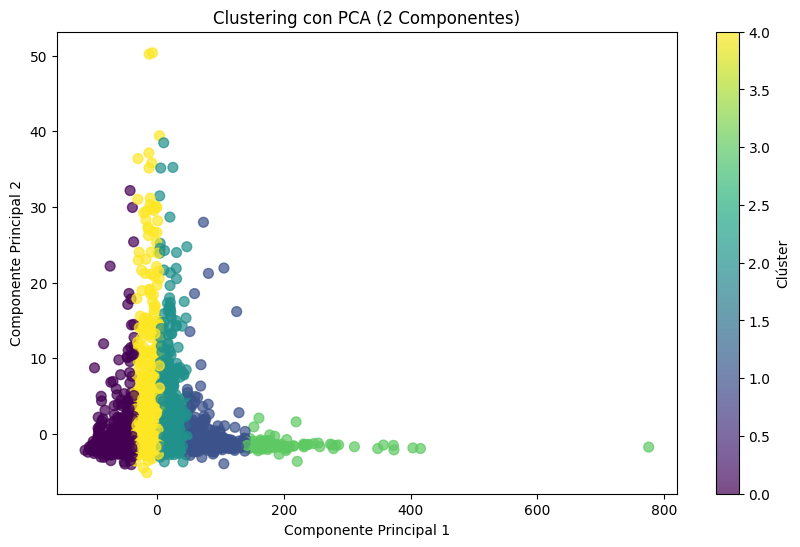

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Reducción de dimensionalidad con PCA
n_components = 2  # Reducimos a 2 dimensiones para visualización
pca = PCA(n_components=n_components, random_state=42)
X_train_pca = pca.fit_transform(X_train)

# Visualizar la varianza explicada por los componentes
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por los {n_components} componentes principales: {explained_variance.sum():.2f}")

# Clustering con K-Means en los datos reducidos
kmeans = KMeans(n_clusters=5, random_state=42)  # Número de clústeres ajustable
kmeans.fit(X_train_pca)
labels = kmeans.labels_

# Visualizar los clústeres en 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title("Clustering con PCA (2 Componentes)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Clúster')
plt.show()


In [ ]:
cluster_means = train_data.groupby('Cluster').mean()
print(cluster_means)


                Year   Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Cluster                                                                         
0        2014.905861 -0.144976        0.017739        -0.112042     -0.177067   
1        2015.350775 -0.135302       -0.035091        -0.098225     -0.181366   
2        2015.305495  0.020791       -0.035650         0.019275      0.017553   
3        2015.500000 -0.276452        0.597102        -0.219483     -0.323245   
4        2015.188602  0.058381       -0.039950         0.047936      0.064491   

         R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
Cluster                                                                     
0           -0.062962     -0.164897           -0.148566         -0.191736   
1           -0.000392     -0.146030           -0.138481         -0.221972   
2            0.001697      0.018523            0.008492          0.030821   
3           -0.095868     -0.278104           -

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_train_pca, kmeans.labels_)
print(f"Índice de Silueta: {score}")


Índice de Silueta: 0.5017443999609356


Un valor de 0.50 indica que:

## Separación Moderada:

Los clústeres tienen una separación razonable, pero hay cierta superposición entre ellos, lo cual ya era evidente en la visualización (particularmente entre los clústeres 1, 2 y 4).

## Calidad Aceptable:

Aunque no es perfecto, un índice de silueta de 0.50 es considerado aceptable, especialmente en datasets con alta dimensionalidad o ruido. Sugiere que el clustering está capturando patrones significativos en los datos.

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_train_pca, kmeans.labels_)
print(f"Índice de Davies-Bouldin: {db_score}")
# Valores más bajos indican mejor separación de los clústeres.


Índice de Davies-Bouldin: 0.570116059756387



## Probar con Menos Clústeres

Considera reducir el número de clústeres a 3 o 4 para evitar superposición. Volver a calcular los índices de Davies-Bouldin y Silueta para comparar.


In [ ]:
# K-Means con menos clústeres
kmeans_fewer_clusters = KMeans(n_clusters=3, random_state=42)
kmeans_fewer_clusters.fit(X_train_pca)

# Índices de validación
silhouette_fewer = silhouette_score(X_train_pca, kmeans_fewer_clusters.labels_)
db_fewer = davies_bouldin_score(X_train_pca, kmeans_fewer_clusters.labels_)

print(f"Índice de Silueta (3 clústeres): {silhouette_fewer}")
print(f"Índice de Davies-Bouldin (3 clústeres): {db_fewer}")


Índice de Silueta (3 clústeres): 0.5121004306339283
Índice de Davies-Bouldin (3 clústeres): 0.6110096970198241


In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por los componentes principales: {explained_variance}")


Varianza explicada por los componentes principales: [0.95398648 0.00672013]


# Interpretación:
Dominancia del Primer Componente Principal (PC1):

La mayoría de la variabilidad en los datos está contenida en el primer componente principal. Esto sugiere que el conjunto de datos tiene una estructura altamente lineal o que una característica (o combinación de características) domina la representación de los datos.

## Baja Varianza en PC2:

El segundo componente principal añade muy poca información adicional. Esto indica que el segundo eje no contribuye significativamente a capturar patrones en los datos.
Implicaciones para el Análisis de Clustering:

Dado que PC1 explica casi toda la varianza, los clústeres observados en el gráfico bidimensional (PC1 vs PC2) pueden depender principalmente de la separación en PC1.

Esto podría explicar la superposición observada entre algunos clústeres en el gráfico, ya que PC2 no ofrece suficiente información adicional para separar claramente los grupos.

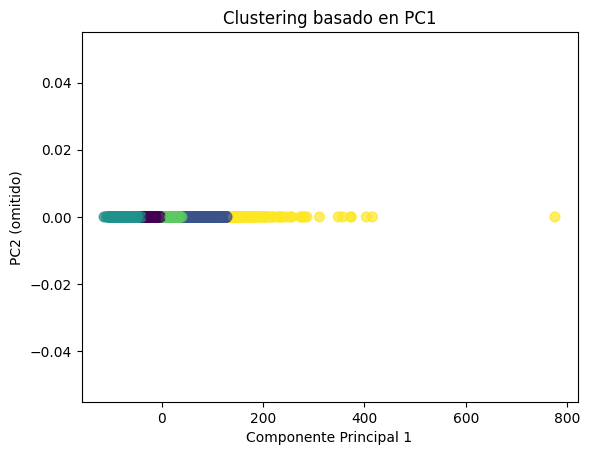

In [ ]:
# Clustering solo con PC1
kmeans_pc1 = KMeans(n_clusters=5, random_state=42)
kmeans_pc1.fit(X_train_pca[:, :1])  # Solo PC1

# Visualización
plt.scatter(X_train_pca[:, 0], [0] * len(X_train_pca[:, 0]), c=kmeans_pc1.labels_, cmap='viridis', s=50, alpha=0.7)
plt.title("Clustering basado en PC1")
plt.xlabel("Componente Principal 1")
plt.ylabel("PC2 (omitido)")
plt.show()


In [ ]:
# Cargar componentes del PCA
components = pd.DataFrame(pca.components_, columns=X_train.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])
print("Componentes principales y sus pesos:")
print(components.loc['PC1'])  # Pesos para PC1


Componentes principales y sus pesos:
Revenue                -0.000109
Revenue Growth          0.000649
Gross Profit           -0.000169
R&D Expenses            0.000188
Operating Income       -0.000230
                          ...   
Debt Growth            -0.000276
R&D Expense Growth     -0.000806
SG&A Expenses Growth   -0.001074
Sector                  0.002066
Price Var               0.999984
Name: PC1, Length: 111, dtype: float64


# Observaciones Clave:

## Dominancia de Price Var:

La característica Price Var tiene un peso extremadamente alto (0.999984) en el primer componente principal.
Esto significa que PC1 está casi completamente definido por Price Var, mientras que las otras características tienen pesos muy bajos o insignificantes.

**Interpretación:** La variabilidad del precio domina la estructura del dataset, y cualquier análisis basado en PCA estará fuertemente influenciado por esta característica.

# Implicaciones para el Clustering:

Dado que Price Var domina el primer componente, el clustering basado en PCA será casi idéntico al clustering que usaría únicamente Price Var como variable.

Esto explica por qué los clústeres dependen tanto de esta característica y por qué hay superposición entre los clústeres 1, 2 y 4 (que representan rangos moderados de Price Var).

## Posible Reducción de Características:

Si Price Var ya captura casi toda la información relevante, podría ser más eficiente trabajar directamente con esta característica en lugar de usar PCA.

#Análisis con Discretización de Price Var

Discretizamos Price Var en quintiles y analizamos la relación con los clústeres.

<ipython-input-53-2757f803f139>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Cluster_Price_Var'] = kmeans_price_var.labels_


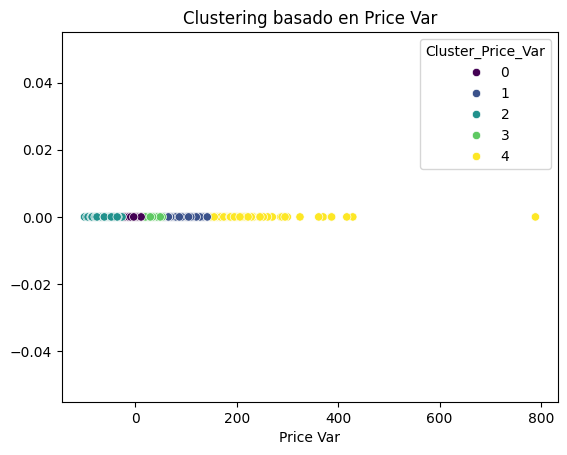

In [ ]:
kmeans_price_var = KMeans(n_clusters=5, random_state=42)
kmeans_price_var.fit(train_data[['Price Var']])
train_data['Cluster_Price_Var'] = kmeans_price_var.labels_

# Visualización
sns.scatterplot(x=train_data['Price Var'], y=[0] * len(train_data), hue=train_data['Cluster_Price_Var'], palette='viridis')
plt.title("Clustering basado en Price Var")
plt.xlabel("Price Var")
plt.show()


<ipython-input-54-8778f5b9141a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Cluster'] = labels


Class         0.0       1.0
Cluster                    
0        1.000000       NaN
1             NaN  1.000000
2             NaN  1.000000
3             NaN  1.000000
4        0.480115  0.519885


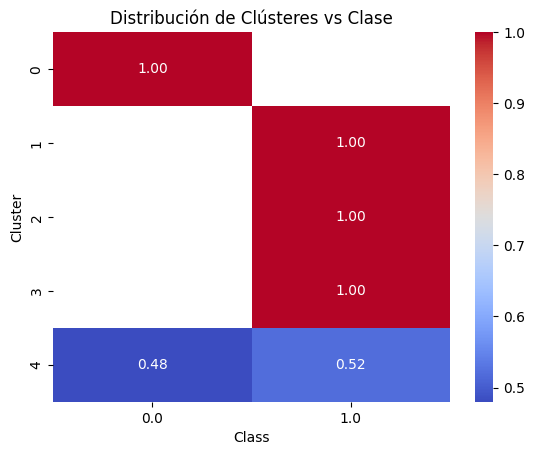

In [ ]:
# Agregar etiquetas de clúster a los datos originales
train_data['Cluster'] = labels

# Comparar distribución de clústeres con las clases
cluster_class_comparison = train_data.groupby('Cluster')['Class'].value_counts(normalize=True).unstack()
print(cluster_class_comparison)

# Visualización con heatmap
sns.heatmap(cluster_class_comparison, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Distribución de Clústeres vs Clase")
plt.show()


# Interpretación del Heatmap:

# Clústeres 0, 1, 2, y 3:

Estos clústeres están completamente dominados por una sola clase (Class = 0 o Class = 1).

## Interpretación:
El modelo de clustering identificó grupos homogéneos de datos.

Los clústeres son consistentes con una clase específica, lo que sugiere que las características utilizadas separan bien estas observaciones.

# Clúster 4:

Este clúster contiene una mezcla más equilibrada de ambas clases:
* Clase 0: 48%
* Clase 1: 52%

**Interpretación:**
Este clúster representa un grupo donde las características no permiten una separación clara entre las clases.

Esto puede reflejar:
* Casos con alta variabilidad o ruido.
* Ejemplos que comparten características comunes entre ambas clases.

# Homogeneidad de los Clústeres:

La mayoría de los clústeres (0, 1, 2 y 3) están claramente relacionados con una clase específica. Esto indica que las características principales identificadas por el PCA permiten una separación efectiva entre las clases.

## Heterogeneidad del Clúster 4:

El clúster 4 destaca por su mezcla de clases, sugiriendo que aquí se encuentran los casos más complejos o atípicos. Es posible que este clúster requiera un análisis más detallado

<ipython-input-36-545de0c8db06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Price_Var_Quintile'] = pd.qcut(train_data['Price Var'], 5, labels=False)


Price_Var_Quintile        0         1         2         3         4
Cluster                                                            
0                   1.00000       NaN       NaN       NaN       NaN
1                       NaN       NaN       NaN       NaN  1.000000
2                       NaN       NaN  0.017033  0.658242  0.324725
3                       NaN       NaN       NaN       NaN  1.000000
4                   0.02993  0.491185  0.478885       NaN       NaN


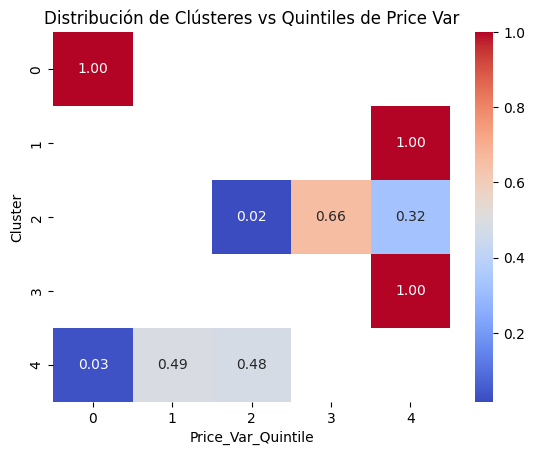

In [ ]:
# Discretizar 'Price Var' en quintiles
train_data['Price_Var_Quintile'] = pd.qcut(train_data['Price Var'], 5, labels=False)

# Analizar relación entre clústeres y quintiles
cluster_price_comparison = train_data.groupby('Cluster')['Price_Var_Quintile'].value_counts(normalize=True).unstack()
print(cluster_price_comparison)

# Visualizar
sns.heatmap(cluster_price_comparison, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Distribución de Clústeres vs Quintiles de Price Var")
plt.show()


Realizado el análisis por clustering, por medio de la reducción de dimensionalidad PCA, nos permitió identificar patrones significativos en estos datos, donde se crearon grupos utilizando el método K-Means, inicialmente con 5 clústeres, y donde se evaluaron métricas como el índice de silueta (0.50) y Davies-Bouldin (0.57), dando como resultado una calidad aceptable de separación entre los clústeres. Una observación clave es la dominancia de la variable Price Var en el primer componente principal (PC1), lo que sugiere que la mayoría de la variabilidad en los datos está influenciada por esta característica. Esto quedó reflejado en la superposición explicada visualmente entre algunos clústeres, particularmente entre los grupos 1, 2 y 4.

Después, al reducir el número de clústeres a 3, se observó una mejoría en el índice de silueta, alcanzando 0.51, mientras que el índice Davies-Bouldin mostró una pequeña disminución en calidad (0.61). Este ajuste destacó que una menor cantidad de clústeres puede facilitar una mejor interpretación sin perder demasiada información. Además, se analizaron las relaciones entre los clústeres y las clases (Class), observándose que los grupos 0, 1, 2 y 3 eran homogéneos y estaban claramente asociados con una clase específica. Sin embargo, el clúster 4 presentó una mezcla casi equilibrada de ambas clases, sugiriendo que representa los casos más complejos o atípicos.

Sumado a lo anterior, se realizó un análisis con la variable Price Var discretizada en quintiles, donde se observó una alineación significativa para los rangos de esta variable y la formación de clústeres, dando como resultado que Price Var es una característica clave que determina gran parte de la estructura del dataset.